----

# Tabla de Contenido

* [1 Cargar los datos](#1)
* [2 Analizar los datos](#2)
    * [2.1 Top 10 de compañías](#2.1)
    * [2.2 Top 10 de Destinos](#2.2)
* [3 Estudio](#3)
    * [3.1 Estudio de df_ohare](#3.1)
    

## Cargar los datos

In [1]:
# cargamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# cargamos los dataframes

df_compania = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')
df_viajes = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')
df_ohare = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv')

In [8]:
# visualizamos al dataframde de la compañía

df_compania

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [56]:
df_compania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
df_compania.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
# mostramos los datos únicos de las compañías

df_compania['company_name'].sort_values().unique()

array(['0118 - 42111 Godfrey S.Awir', '1085 - 72312 N and W Cab Co',
       '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih company',
       '2192 - 73487 Zeymane Corp',
       '2241 - 44667 - Felman Corp, Manuel Alonso', '24 Seven Taxi',
       '2733 - 74600 Benny Jona', '2809 - 95474 C & D Cab Co Inc.',
       '2823 - 73307 Lee Express Inc', '3011 - 66308 JBL Cab Inc.',
       '303 Taxi', '3556 - 36214 RC Andrews Cab',
       '3591 - 63480 Chuks Cab', '3620 - 52292 David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises',
       '3721 - Santamaria Express, Alvaro Santamaria',
       '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson',
       '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa',
       '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc',
       '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.',
       '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.',
       '6742 - 83735 Tasha ride inc', '6743 - 78771 Luhak Corp'

In [55]:
# visualizamos el dataframe de los viajes

df_viajes

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


In [12]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [13]:
df_viajes.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [57]:
# mostramos los datos únicos de los lugares

df_viajes['dropoff_location_name'].sort_values().unique()

array(['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square',
       'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport',
       'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights',
       'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas',
       'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park',
       'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park',
       'Garfield Ridge', 'Gold Coast', 'Grand Boulevard',
       'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa',
       'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Little Italy, UIC', 'Little Village',
       'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park',
       'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus',
       'Near South Side', 'New City', 'North Center', 'Nor

In [58]:
# cambiamos el tipo de la columna

df_viajes['average_trips'] = df_viajes['average_trips'].apply(np.int64)

df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
df_viajes

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


**Conclusión:**

* Se cargaron los datos y se visualizaron los dos dataframes correspondientes a las compañías y lugares destino. Asimismo, se mostraron los valores únicos de cada dataframe en las columnas que poseen tipo object.

* Se cambio el tipo de la columna average_trips para su mejor estudio.
    
    

## Analizar los datos

### Top 10 de compañías

In [21]:
# seleccionamos las 10 principales compañías

top_compania = df_compania.sort_values(by = 'trips_amount', ascending = False).head(10)
top_compania 

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


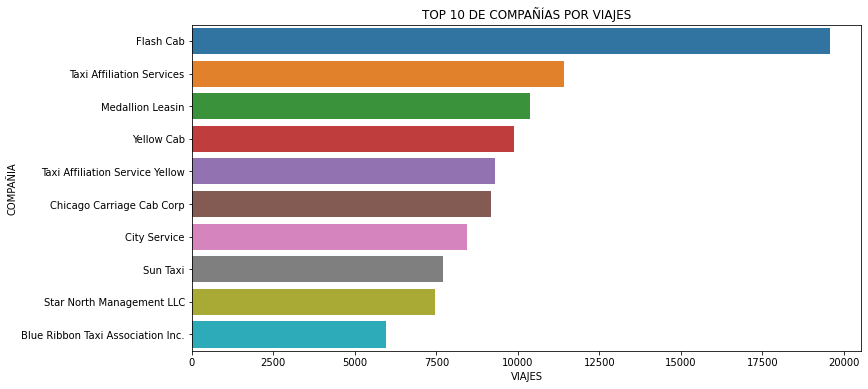

In [24]:
# graficamos la relacion de las compañías con los viajes 

plt.figure(figsize = (12,6))
ax = sns.barplot(data = top_compania, x = 'trips_amount', y = 'company_name')
ax.set_xlabel('VIAJES')
ax.set_ylabel('COMPAÑIA')
ax.set_title('TOP 10 DE COMPAÑÍAS POR VIAJES')
plt.show()

### Top 10 de Destinos

In [60]:
# seleccionamos los 10 principales destinos 

top_destino = df_viajes.sort_values(by = 'average_trips', ascending = False).head(10)
top_destino

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


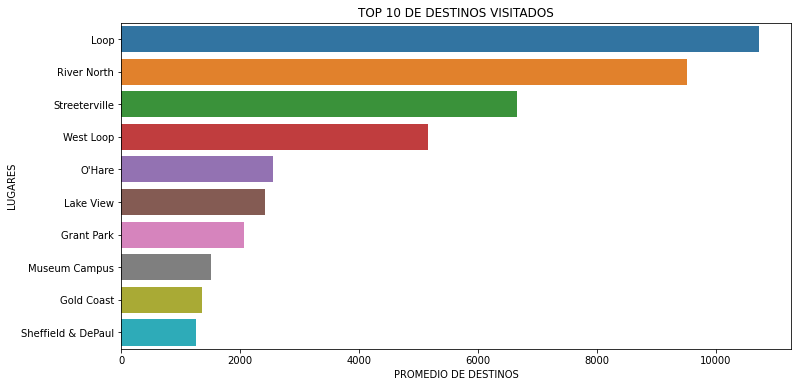

In [61]:
# graficamos la relación entre los destinos y sus viajes

plt.figure(figsize = (12,6))
ax = sns.barplot(data = top_destino, x = 'average_trips', y = 'dropoff_location_name')
ax.set_xlabel('PROMEDIO DE DESTINOS')
ax.set_ylabel('LUGARES')
ax.set_title('TOP 10 DE DESTINOS VISITADOS')
plt.show()

**Conclusión:**
    
* En este apartado, se realizó un filtrado donde se muestra las 10 principales compañías y los 10 principales destinos.

* En las principales compañías, tenemos a Flash Cab de primer lugar, mientras le siguen Taxi Affiliation Services y Medallion Leasin. La cantidad de más viajes fue de 19558.

* En los principales destinos, tenemos a Loop de primer lugar, mientras le siguen River North y Sreeterville. El promedio mayor de viajes a ese destino fue de 10727.


## Estudio

### Estudiamos a df_ohare

In [62]:
# mostramos el dataframe con datos de viajes desde Loop al aeropuerto O'Hare.

df_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [31]:
df_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [33]:
df_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [63]:
# cambiamos el tipo de la columna a datetime

df_ohare['start_ts'] = pd.to_datetime(df_ohare['start_ts'], infer_datetime_format = True)

df_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [64]:
# realizamos un filtrado para visualizar datos

df_ohare.groupby('weather_conditions').agg(cantidad = ('start_ts', 'count'), 
                                           aveg_seg = ('duration_seconds', 'mean'),
                                           total_seg = ('duration_seconds', 'sum')).reset_index()




,weather_conditions,cantidad,aveg_seg,total_seg
0,Bad,180,2427.205556,436897.0
1,Good,888,1999.675676,1775712.0


In [40]:
# filtramos por condiciones climáticas buenas y malas

df_bad = df_ohare.query('weather_conditions == "Bad"').reset_index(drop = True)
df_good = df_ohare.query('weather_conditions == "Good"').reset_index(drop = True)

**Conclusión:**
    
* Mostramos la información general del dataframe con información detallada, donde se le realizó un cambio de tipo de columna a formato datatime.

* Agrupamos la información para determinar por condiciones climáticas, cuantos viajes se hicieron en malas y buenas condiciones.

* Se crearon nuevos dataframes filtrados para estudiar las hipótesis.

## Evaluación de las hipotésis

**Hipótesis:**
    
* H0: El promedio de viaje de Loop al Aeropuerto O'Hare no cambia los sábados de lluvia
* H1: El promedio de viaje de Loop al Aeropuerto O'Hare cambia los sábados de lluvia

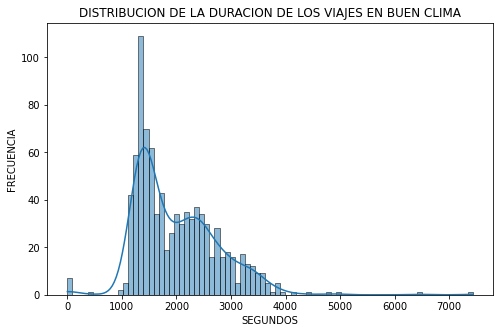

In [67]:
# graficamos la distribución de los viajes en buen clima

plt.figure(figsize = (8,5))
sns.histplot(df_good['duration_seconds'], bins = 80, kde = True)
plt.xlabel('SEGUNDOS')
plt.ylabel('FRECUENCIA')
plt.title('DISTRIBUCION DE LA DURACION DE LOS VIAJES EN BUEN CLIMA')
plt.show()

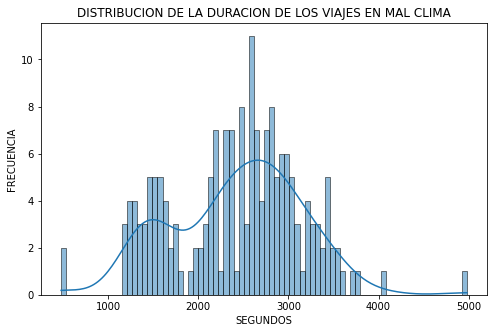

In [66]:
# graficamos la distribución de los viajes en mal clima

plt.figure(figsize = (8,5))
sns.histplot(df_bad['duration_seconds'], bins = 80, kde = True)
plt.xlabel('SEGUNDOS')
plt.ylabel('FRECUENCIA')
plt.title('DISTRIBUCION DE LA DURACION DE LOS VIAJES EN MAL CLIMA')
plt.show()

In [68]:
# aplicamos el test de Levene para determinar si equal_var es True o False

st.levene(df_good['duration_seconds'], df_bad['duration_seconds'])

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

In [53]:
# procedemos a determinar si la hipótesis es nula o verdadera, ya con equal_var siendo mayor que alpha

alpha = 0.05
results = st.ttest_ind(df_good['duration_seconds'], df_bad['duration_seconds'], equal_var = True)
print ('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('RECHAZAMOS LA HIPOTESIS NULA')
else:
    print('NO RECHAZAMOS LA HIPOTESIS NULA')

p-value: 6.517970327099473e-12
RECHAZAMOS LA HIPOTESIS NULA


**Conclusión:**
    
* Los resultados nos indican que el promedio de viajes de Loop al Aeropuerto O'Hire cambia los sábados de lluvia, entonces el clima afecta la duración del viaje, en unos 7 - 8 minutos aproximadamente (436897 segundos).

# Conclusiones generales

* El proyecto inicia con la recopilación de datos externos de una página web, donde se crea información en una base de datos para después ser estudiada.

* Se disponen 3 dataframes, las cuales son el estudio de las compañías que utilizan el servicio, los destinos que son los barrios de Chicago y de último un dataframe con relaciónes entre el destino más visitado y su ida al Aeropuerto de la ciudad.

* Se puede decir que con tiempo lluvioso, habrán retrasos en la recogida o llegada a los distintos destinos, lo cual se recomienda avisar y tener una efectiva comunicación para evitar inconvenientes.

* Las principales compañías que utilizaron el servicion son: Flash Cab, Taxi Affiliation Services y Medallion Leasin.

* Los principales destinos fueron: Loop, River North, Streeterville.